In [1]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
%matplotlib inline

# test1

In [2]:
iris = datasets.load_iris()

parameters = {
    'kernel':('linear', 'rbf'), 
    'C':[1, 2, 4], 
    'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]
}

svr = svm.SVC() # 模型
clf = GridSearchCV( svr, parameters, n_jobs=4 )
clf.fit(iris.data, iris.target)

cv_result = pd.DataFrame.from_dict( clf.cv_results_ )
print('The parameters of the best model are: ',clf.best_params_)# 打印出最合适的模型参数
y_pred_array = clf.predict(iris.data) # 预测结果

The parameters of the best model are:  {'C': 4, 'gamma': 0.125, 'kernel': 'rbf'}


In [4]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001402,7.941205e-04,0.000000,0.000000,1,0.125,linear,"{'C': 1, 'gamma': 0.125, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,3
1,0.000797,3.984052e-04,0.000199,0.000399,1,0.125,rbf,"{'C': 1, 'gamma': 0.125, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,3
2,0.000399,4.889865e-04,0.000592,0.000483,1,0.25,linear,"{'C': 1, 'gamma': 0.25, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,3
3,0.000798,3.988745e-04,0.000406,0.000498,1,0.25,rbf,"{'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,3
4,0.000997,2.686418e-06,0.000200,0.000400,1,0.5,linear,"{'C': 1, 'gamma': 0.5, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,3
5,0.000601,4.904467e-04,0.000597,0.000488,1,0.5,rbf,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,3
6,0.000598,4.886965e-04,0.000399,0.000489,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,3
7,0.000798,3.990921e-04,0.000000,0.000000,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.966667,1.000000,0.900000,0.966667,1.000000,0.966667,0.036515,30
8,0.000399,4.885778e-04,0.000392,0.000480,1,2,linear,"{'C': 1, 'gamma': 2, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,3
9,0.000385,4.718751e-04,0.000606,0.000495,1,2,rbf,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",0.966667,1.000000,0.900000,0.966667,1.000000,0.966667,0.036515,30


# test2

In [5]:
%matplotlib inline
from sklearn import datasets 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.model_selection import cross_val_score 
import pickle

X = np.sort(5 * np.random.rand(500, 1), axis=0)#ndim=1
y = np.exp( -X**2 ) + np.random.normal(0, 0.05, X.shape) #ndim=2
y_= y. ravel()#ndim=1

better_score =0
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(X, y_, test_size=0.3) 
    svr_poly = SVR(kernel='rbf', C=1e3, gamma=0.1)
    x_test =sorted(x_test)
    y_test= sorted(y_test, reverse=True)
    y_poly= svr_poly.fit(x_train,y_train).predict(x_test)
    score = svr_poly.score(x_test,y_test)
    print(score)
    if better_score>score:
        better_score = better_score
    else:
        better_score = score
        fitting = svr_poly
        xx=x_test 
        yy=y_test

print('Best R^2 is: {}'.format(better_score)) 

0.9796780394174983
0.9754406891867258
0.9697558972326769
0.9706216613939185
0.9797008646254081
0.972330043854472
0.979348443200548
0.9621303409359461
0.9614130944827629
0.9771577245696424
0.9791513272808336
0.9762499899715473
0.9762351314295481
0.9762375245797343
0.9719202944878256
0.9656145967051037
0.9660309198246512
0.9728290968743974
0.9738073398671087
0.97172986675084
0.9721711849141564
0.9734285883610437
0.968371041614465
0.9718817077216697
0.9798839340842795
0.9799378870441644
0.9677334812707403
0.9699608760975026
0.967678548623685
0.9753332563141635
0.9671687837933309
0.9705431278883688
0.9730897996651556
0.9705123136161659
0.9765819227693073
0.970942573504036
0.9793119528935025
0.975327238916689
0.9679314176001155
0.9779715477262069
0.9622233592303869
0.9712742134671184
0.9648561510665854
0.9742735976033727
0.9742972792732248
0.9788667992432845
0.985379315558637
0.9787871112952822
0.9716039593107689
0.9652151626058103
0.9661926161540737
0.9706583561174268
0.9638727506353103
0.

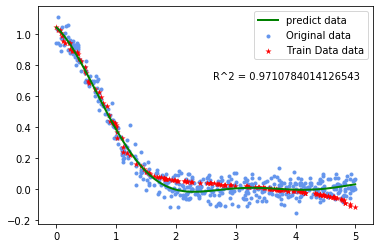

In [6]:
xx = sorted(xx)
yy = sorted(yy,reverse=True) 
yyy= fitting.fit(x_train,y_train).predict(xx)
plt.annotate('R^2 = '+str(fitting.score(x_train,y_train)), xy=(0.55, 0.9), xycoords='figure fraction', xytext=(0.56, 0.68))
plt.scatter(X,y,lw =1,marker='.',c= 'cornflowerblue', label='Original data') #劃出原始資料的xy對照圖(藍色)
plt.scatter(xx,yy,lw= 0.1,marker='*',c ='r', label='Train Data data')#訓練出最好機器的那筆訓練數據(紅色)
plt.plot( xx,yyy, color='g', lw=2, label='predict data')
#最後用最好的機器，經由原始訓練資料的計算後，使用訓練出那個機器的XX資料推測預測值，做出來的預測結果(綠色)
plt.legend()


# Comparison of multiple cores

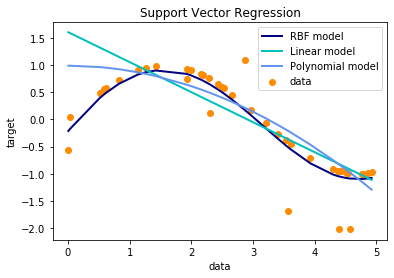

In [7]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit regression model
svr_rbf  = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin  = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

plt.figure()
plt.scatter(X, y, color='darkorange', label='data')

plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

# train and time cost

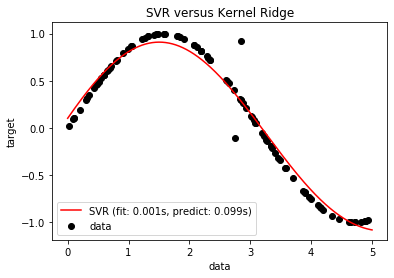

In [8]:
from __future__ import division
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# 隨機數據
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))
 
X_plot = np.linspace(0, 5, 100000)[:, None]
 

# 訓練模型 
train_size = 100
#初始化SVR，也可以改成下面簡單的寫法
# svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5, 
#                    param_grid={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)})
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

#紀錄訓練時間------------------
t0 = time.time()
#训练
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0

#紀錄測試時間#------------------
t0 = time.time()

y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0

# plot it ---------------------
plt.figure()
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1)
# plt.hold('on')
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
 
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

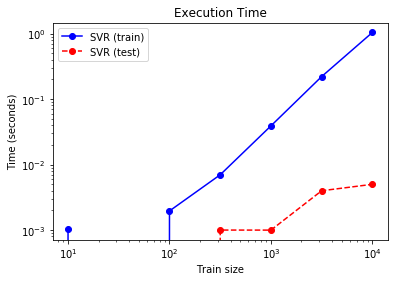

In [9]:
#  訓練耗時可視化
X = 5 * rng.rand(1000000, 1)
y = np.sin(X).ravel()
y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))
sizes = np.logspace(1, 4, 7)
for name, estimator in {"SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:int(train_test_size)], y[:int(train_test_size)])
        train_time.append(time.time() - t0)
 
        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)
 
    plt.plot(sizes, train_time, 'o-', color="b" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")